<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD(S)_1_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea list
1. take data from google drive, so it can use a lot of data files easily
2. regulate the horizontal line, so it can the full right area  
3. take FWHM and rising time, fall time. 10% point, 20% point ect. for other features.

### 1. Extract the data to the arrays using interpolation.(20 data between each raw data) You don't need to run this section(it takes a lot of time)

In [1]:
!pip install tqdm
from tqdm import tqdm
import time

import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount the Google Drive to access files
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
# Set the directory path where CSV files are located
#dirname = '/content/drive/My Drive/autoPSD.Sr90/'
dirname = '/content/drive/My Drive/PSD(Shape)/autoPSD.Sr90-2/'
# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Sr90"

# start_num = 0
# end_num = 21800

start_num = 22000
end_num = 22100

num_files = end_num - start_num + 1


for file_num in range(start_num, end_num + 1):
    # Construct the full filename by appending the file number to the base filename
    filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

    # Load the data from the CSV file and skip the first 5 rows
    data = np.loadtxt(filename, delimiter=",", skiprows=5)
    # Extract the first column as the x-axis and the second column as the y-axis
    x = data[:, 0]
    y = data[:, 1]

    # Add interpolated points
    interp_x = []
    interp_y = []
    for i in range(len(x)):
        interp_x.append(x[i])
        interp_y.append(y[i])
        if i < len(x) - 1:
            # Calculate the midpoint between the current x and the next x
            midpoint_x = (x[i] + x[i+1]) / 2
            # Add 20 interpolated points between the current x and the next x
            interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
            interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
            interp_x.extend(interp_xs[1:])
            interp_y.extend(interp_ys[1:])

    # Append the interpolated x and y data to the arrays
    interp_x_all.append(interp_x)
    interp_y_all.append(interp_y)

# Convert the lists of interpolated data to a 2D numpy array
C3Sr90_x = np.zeros((num_files, len(interp_x_all[0])))
C3Sr90_y = np.zeros((num_files, len(interp_y_all[0])))
for i in range(num_files):
    C3Sr90_x[i, :] = interp_x_all[i]
    C3Sr90_y[i, :] = interp_y_all[i]# Loop through each file number
  
# Print the shape of the array
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)

(101, 2122)
(101, 2122)


In [ ]:
print(C3Sr90_x)
print(C3Sr90_y)

[[-9.3315e-09 -9.3065e-09 -9.2815e-09 ...  4.1143e-08  4.1168e-08
   4.1168e-08]
 [-9.0051e-09 -8.9801e-09 -8.9551e-09 ...  4.1470e-08  4.1495e-08
   4.1495e-08]
 [-9.4722e-09 -9.4472e-09 -9.4222e-09 ...  4.1003e-08  4.1028e-08
   4.1028e-08]
 ...
 [-9.3294e-09 -9.3044e-09 -9.2794e-09 ...  4.1146e-08  4.1171e-08
   4.1171e-08]
 [-9.2635e-09 -9.2385e-09 -9.2135e-09 ...  4.1211e-08  4.1236e-08
   4.1236e-08]
 [-9.1476e-09 -9.1226e-09 -9.0976e-09 ...  4.1327e-08  4.1352e-08
   4.1352e-08]]
[[-0.00051561 -0.00051361 -0.00051161 ... -0.00168509 -0.00167509
  -0.00167509]
 [-0.00063555 -0.00065555 -0.00067554 ... -0.00111334 -0.00111534
  -0.00111534]
 [-0.00051561 -0.0005296  -0.0005436  ... -0.00172307 -0.00171507
  -0.00171507]
 ...
 [-0.00055559 -0.00059357 -0.00063156 ... -0.00159713 -0.00159513
  -0.00159513]
 [-0.00071552 -0.00069153 -0.00066754 ... -0.00162911 -0.00163511
  -0.00163511]
 [-0.00063555 -0.00064355 -0.00065155 ... -0.00182502 -0.00183502
  -0.00183502]]


In [ ]:
C3Sr90_x.shape
C3Sr90_y.shape

(101, 2122)

In [4]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/PSD(Shape)/autoPSD.Cs137-2/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Cs137"
start_num = 22000
end_num = 22100
#end_num = 100

num_files = end_num - start_num + 1

for i in tqdm(range(100)):
  # Loop through each file number
  for file_num in range(start_num, end_num + 1):
      # Construct the full filename by appending the file number to the base filename
      filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

      # Load the data from the CSV file and skip the first 5 rows
      data = np.loadtxt(filename, delimiter=",", skiprows=5)

      # Extract the first column as the x-axis and the second column as the y-axis
      x = data[:, 0]
      y = data[:, 1]

      # Add interpolated points
      interp_x = []
      interp_y = []
      for i in range(len(x)):
          interp_x.append(x[i])
          interp_y.append(y[i])
          if i < len(x) - 1:
              # Calculate the midpoint between the current x and the next x
              midpoint_x = (x[i] + x[i+1]) / 2
              # Add 20 interpolated points between the current x and the next x
              interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
              interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
              interp_x.extend(interp_xs[1:])
              interp_y.extend(interp_ys[1:])

      # Append the interpolated x and y data to the arrays
      interp_x_all.append(interp_x)
      interp_y_all.append(interp_y)

  # Convert the lists of interpolated data to a 2D numpy array
  C3Cs137_x = np.zeros((num_files, len(interp_x_all[0])))
  C3Cs137_y = np.zeros((num_files, len(interp_y_all[0])))
  for i in range(num_files):
      C3Cs137_x[i, :] = interp_x_all[i]
      C3Cs137_y[i, :] = interp_y_all[i]

time.sleep(0.01)
# Print the shape of the array
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)

100%|██████████| 100/100 [00:54<00:00,  1.84it/s]

(101, 2122)
(101, 2122)


In [2]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/PSD(Shape)/autoPSD.Cs137-2/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Cs137"
start_num = 22000
end_num = 22100
#end_num = 100

num_files = end_num - start_num + 1


# Loop through each file number
for file_num in range(start_num, end_num + 1):
    # Construct the full filename by appending the file number to the base filename
    filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

    # Load the data from the CSV file and skip the first 5 rows
    data = np.loadtxt(filename, delimiter=",", skiprows=5)

    # Extract the first column as the x-axis and the second column as the y-axis
    x = data[:, 0]
    y = data[:, 1]

    # Add interpolated points
    interp_x = []
    interp_y = []
    for i in range(len(x)):
        interp_x.append(x[i])
        interp_y.append(y[i])
        if i < len(x) - 1:
            # Calculate the midpoint between the current x and the next x
            midpoint_x = (x[i] + x[i+1]) / 2
            # Add 20 interpolated points between the current x and the next x
            interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
            interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
            interp_x.extend(interp_xs[1:])
            interp_y.extend(interp_ys[1:])

    # Append the interpolated x and y data to the arrays
    interp_x_all.append(interp_x)
    interp_y_all.append(interp_y)
# Convert the lists of interpolated data to a 2D numpy array
C3Cs137_x = np.zeros((num_files, len(interp_x_all[0])))
C3Cs137_y = np.zeros((num_files, len(interp_y_all[0])))
for i in range(num_files):
    C3Cs137_x[i, :] = interp_x_all[i]
    C3Cs137_y[i, :] = interp_y_all[i]

# Print the shape of the array
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)

(101, 2122)
(101, 2122)


In [ ]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/autoPSD.Bi207-2/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Bi207"
start_num = 22000
end_num = 22100
#end_num = 100

num_files = end_num - start_num + 1

for i in tqdm(range(100)):
  # Loop through each file number
  for file_num in range(start_num, end_num + 1):
      # Construct the full filename by appending the file number to the base filename
      filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

      
      # Load the data from the CSV file and skip the first 5 rows
      data = np.loadtxt(filename, delimiter=",", skiprows=5)
      

      # Extract the first column as the x-axis and the second column as the y-axis
      x = data[:, 0]
      y = data[:, 1]

      # Add interpolated points
      interp_x = []
      interp_y = []
      for i in range(len(x)):
          interp_x.append(x[i])
          interp_y.append(y[i])
          if i < len(x) - 1:
              # Calculate the midpoint between the current x and the next x
              midpoint_x = (x[i] + x[i+1]) / 2
              # Add 20 interpolated points between the current x and the next x
              interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
              interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
              interp_x.extend(interp_xs[1:])
              interp_y.extend(interp_ys[1:])

      # Append the interpolated x and y data to the arrays
      interp_x_all.append(interp_x)
      interp_y_all.append(interp_y)

  # Convert the lists of interpolated data to a 2D numpy array
  C3Bi207_x = np.zeros((num_files, len(interp_x_all[0])))
  C3Bi207_y = np.zeros((num_files, len(interp_y_all[0])))
  for i in range(num_files):
      C3Bi207_x[i, :] = interp_x_all[i]
      C3Bi207_y[i, :] = interp_y_all[i]

    
time.sleep(0.01)
# Print the shape of the array
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)


100%|██████████| 100/100 [01:58<00:00,  1.19s/it]

(101, 2122)
(101, 2122)


In [ ]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/PSD(Shape)/autoPSD.Cs137-2/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Cs137"
start_num = 22000
end_num = 22100
#end_num = 100

num_files = end_num - start_num + 1


# Loop through each file number
for file_num in range(start_num, end_num + 1):
    # Construct the full filename by appending the file number to the base filename
    filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

    # Load the data from the CSV file and skip the first 5 rows
    data = np.loadtxt(filename, delimiter=",", skiprows=5)

    # Extract the first column as the x-axis and the second column as the y-axis
    x = data[:, 0]
    y = data[:, 1]

    # Add interpolated points
    interp_x = []
    interp_y = []
    for i in range(len(x)):
        interp_x.append(x[i])
        interp_y.append(y[i])
        if i < len(x) - 1:
            # Calculate the midpoint between the current x and the next x
            midpoint_x = (x[i] + x[i+1]) / 2
            # Add 20 interpolated points between the current x and the next x
            interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
            interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
            interp_x.extend(interp_xs[1:])
            interp_y.extend(interp_ys[1:])

    # Append the interpolated x and y data to the arrays
    interp_x_all.append(interp_x)
    interp_y_all.append(interp_y)
# Convert the lists of interpolated data to a 2D numpy array
C3Cs137_x = np.zeros((num_files, len(interp_x_all[0])))
C3Cs137_y = np.zeros((num_files, len(interp_y_all[0])))
for i in range(num_files):
    C3Cs137_x[i, :] = interp_x_all[i]
    C3Cs137_y[i, :] = interp_y_all[i]

# Print the shape of the array
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)

In [ ]:
# Define the output file path
output_file_x = '/content/drive/My Drive/PSD(Shape)/autoPSD.Sr90-2/C3Sr90_x2_test2.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_x, C3Sr90_x)

# Define the output file path
output_file_y = '/content/drive/My Drive/PSD(Shape)/autoPSD.Sr90-2/C3Sr90_y2_test2.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_y, C3Sr90_y)

In [ ]:
#Define the output file path
output_file_x = '/content/drive/My Drive/autoPSD.Cs137-2/C3Cs137_x2_test.npy'

#Save the C3Cs137_x array to a .npy file
np.save(output_file_x, C3Cs137_x)

#Define the output file path
output_file_y = '/content/drive/My Drive/autoPSD.Cs137-2/C3Cs137_y2_test.npy'

#Save the C3Cs137_x array to a .npy file
np.save(output_file_y, C3Cs137_y)

In [ ]:
# Define the output file path
output_file_x = '/content/drive/My Drive/autoPSD.Bi207-2/C3Bi207_x2_test.npy'

# Save the C3Bi207_x array to a .npy file
np.save(output_file_x, C3Bi207_x)

# Define the output file path
output_file_y = '/content/drive/My Drive/autoPSD.Bi207-2/C3Bi207_y2_test.npy'

# Save the C3Bi207_x array to a .npy file
np.save(output_file_y, C3Bi207_y)

### 2. Read the organized data(You can starts from here)

In [ ]:
for i in tqdm(range(10)):
    
  # Load the array from the .npy file
  C3Sr90_x = np.load('/content/drive/My Drive/PSD(Shape)/autoPSD.Sr90-2/C3Sr90_x2_test2.npy')
  C3Sr90_y = np.load('/content/drive/My Drive/PSD(Shape)/autoPSD.Sr90-2/C3Sr90_y2_test2.npy')

time.sleep(1)

# Print the shape of the array to verify it is 2D
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)


100%|██████████| 10/10 [00:00<00:00, 122.78it/s]


(101, 2122)
(101, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Cs137_x = np.load('/content/drive/My Drive/autoPSD.Cs137-2/C3Cs137_x2_test.npy')
    C3Cs137_y = np.load('/content/drive/My Drive/autoPSD.Cs137-2/C3Cs137_y2_test.npy')

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)


Progress: 100%|██████████| 10/10 [00:00<00:00, 43.82it/s]


(101, 2122)
(101, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Bi207_x = np.load('/content/drive/My Drive/autoPSD.Bi207-2/C3Bi207_x2_test.npy')
    C3Bi207_y = np.load('/content/drive/My Drive/autoPSD.Bi207-2/C3Bi207_y2_test.npy')

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)

Progress: 100%|██████████| 10/10 [00:00<00:00, 86.95it/s]


(101, 2122)
(101, 2122)


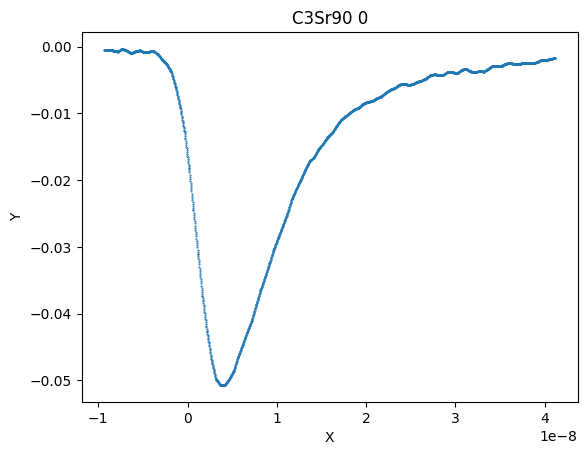

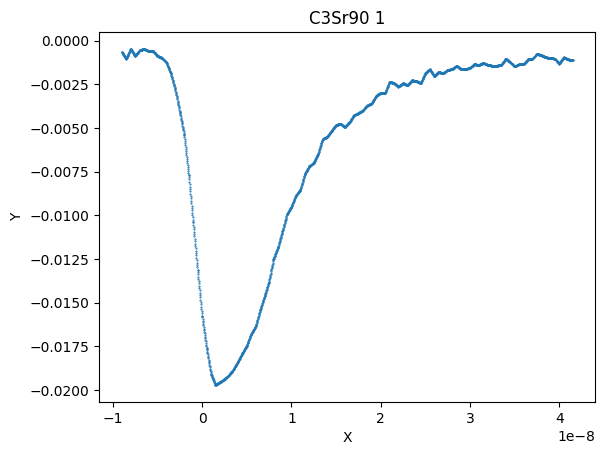

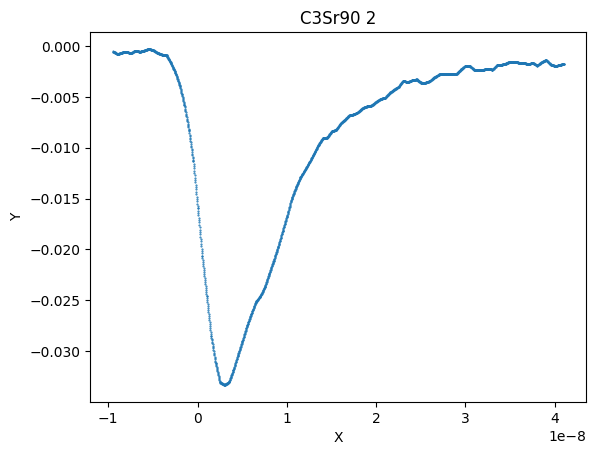

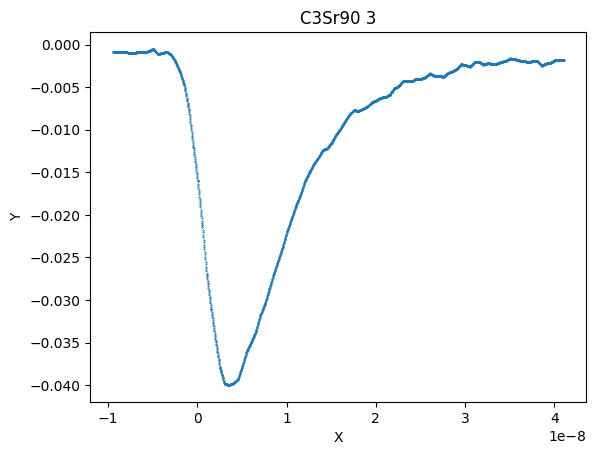

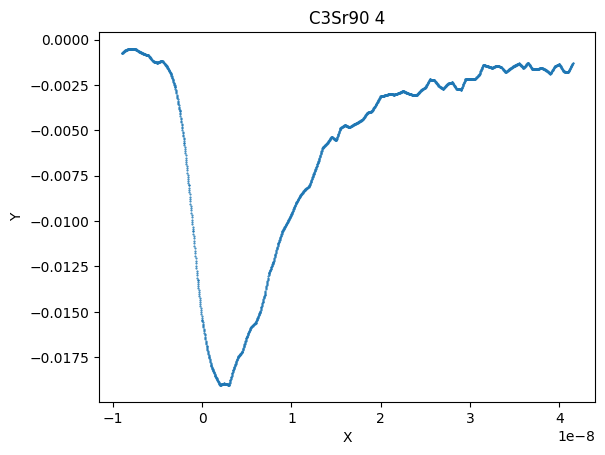

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    plt.show()

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Cs137_x[i], C3Cs137_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Cs137 ' + str(i + start_num))
    plt.show()

NameError: ignored

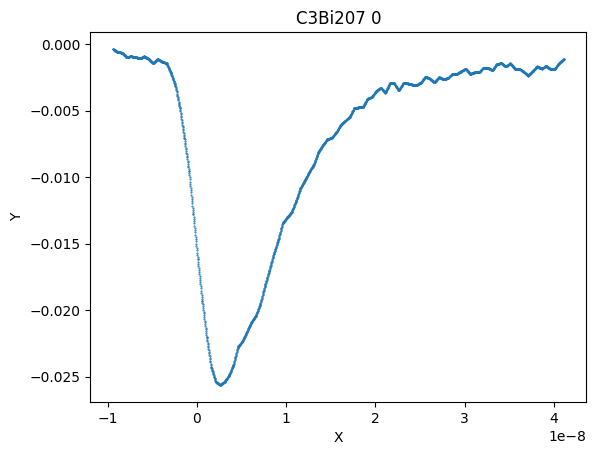

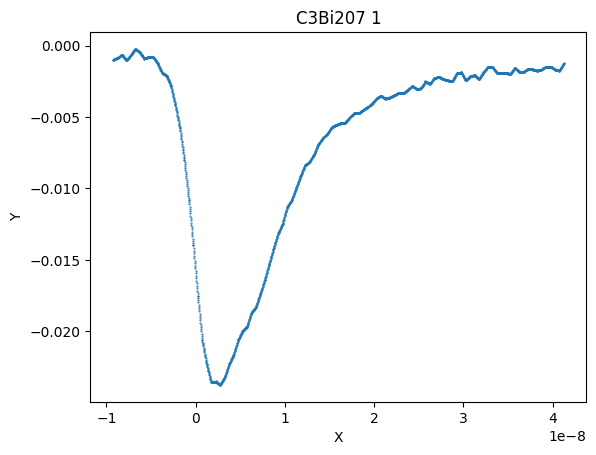

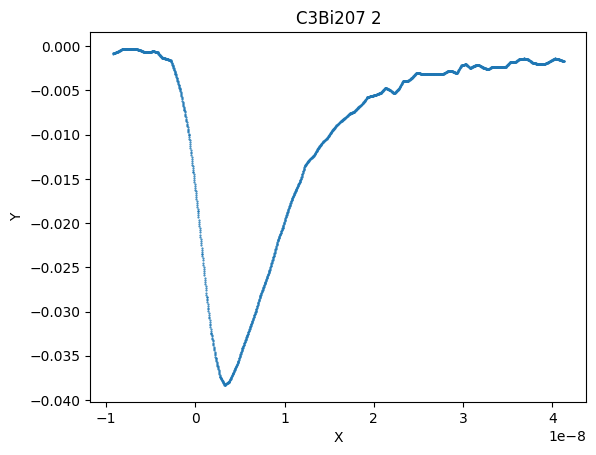

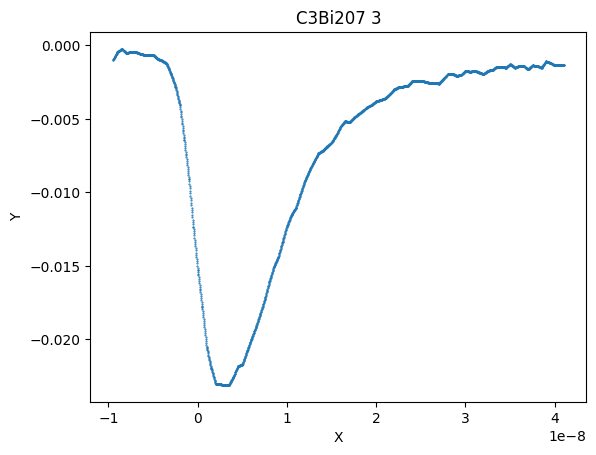

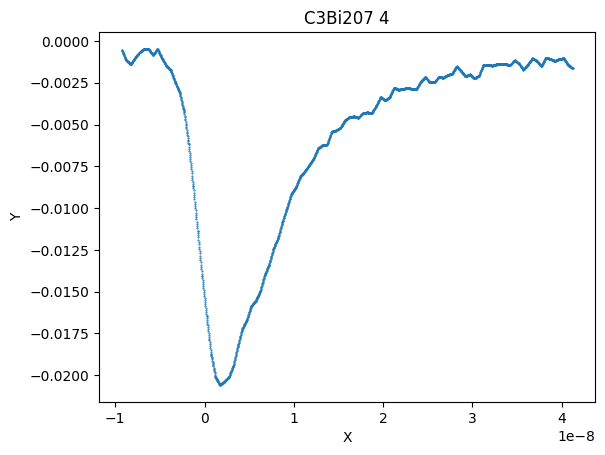

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Bi207_x[i], C3Bi207_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Bi207 ' + str(i + start_num))
    plt.show()

###3. Gamma/Neutron

In [9]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/PSD(Shape)/autoPSD.Cf252/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3cf252"
start_num = 0
end_num = 100
#end_num = 100

num_files = end_num - start_num + 1

for i in tqdm(range(100)):
  # Loop through each file number
  for file_num in range(start_num, end_num + 1):
      # Construct the full filename by appending the file number to the base filename
      filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

      # Load the data from the CSV file and skip the first 5 rows
      data = np.loadtxt(filename, delimiter=",", skiprows=5)

      # Extract the first column as the x-axis and the second column as the y-axis
      x = data[:, 0]
      y = data[:, 1]

      # Add interpolated points
      interp_x = []
      interp_y = []
      for i in range(len(x)):
          interp_x.append(x[i])
          interp_y.append(y[i])
          if i < len(x) - 1:
              # Calculate the midpoint between the current x and the next x
              midpoint_x = (x[i] + x[i+1]) / 2
              # Add 20 interpolated points between the current x and the next x
              interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
              interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
              interp_x.extend(interp_xs[1:])
              interp_y.extend(interp_ys[1:])

      # Append the interpolated x and y data to the arrays
      interp_x_all.append(interp_x)
      interp_y_all.append(interp_y)

  # Convert the lists of interpolated data to a 2D numpy array
  C3Cf252_x = np.zeros((num_files, len(interp_x_all[0])))
  C3Cf252_y = np.zeros((num_files, len(interp_y_all[0])))
  for i in range(num_files):
      C3Cf252_x[i, :] = interp_x_all[i]
      C3Cf252_y[i, :] = interp_y_all[i]

time.sleep(0.01)
# Print the shape of the array
print(C3Cf252_x.shape)
print(C3Cf252_y.shape)

100%|██████████| 100/100 [01:49<00:00,  1.10s/it]

(101, 4222)
(101, 4222)


In [11]:
# Set the directory path where CSV files are located
dirname = '/content/drive/My Drive/PSD(Shape)/Gamma_Cs137/'

# Initialize empty lists to store the left areas and peak heights
interp_x_all = []
interp_y_all = []

# Define the base filename and number of files
base_filename = "C3Cs136"
start_num = 0
end_num = 100
#end_num = 100

num_files = end_num - start_num + 1

for i in tqdm(range(100)):
  # Loop through each file number
  for file_num in range(start_num, end_num + 1):
      # Construct the full filename by appending the file number to the base filename
      filename = os.path.join(dirname, base_filename + str(file_num).zfill(5) + ".csv")

      # Load the data from the CSV file and skip the first 5 rows
      data = np.loadtxt(filename, delimiter=",", skiprows=5)

      # Extract the first column as the x-axis and the second column as the y-axis
      x = data[:, 0]
      y = data[:, 1]

      # Add interpolated points
      interp_x = []
      interp_y = []
      for i in range(len(x)):
          interp_x.append(x[i])
          interp_y.append(y[i])
          if i < len(x) - 1:
              # Calculate the midpoint between the current x and the next x
              midpoint_x = (x[i] + x[i+1]) / 2
              # Add 20 interpolated points between the current x and the next x
              interp_xs = np.linspace(x[i], x[i+1], num=21, endpoint=True)
              interp_ys = np.interp(interp_xs, [x[i], x[i+1]], [y[i], y[i+1]])
              interp_x.extend(interp_xs[1:])
              interp_y.extend(interp_ys[1:])

      # Append the interpolated x and y data to the arrays
      interp_x_all.append(interp_x)
      interp_y_all.append(interp_y)

  # Convert the lists of interpolated data to a 2D numpy array
  C3Cs137_x = np.zeros((num_files, len(interp_x_all[0])))
  C3Cs137_y = np.zeros((num_files, len(interp_y_all[0])))
  for i in range(num_files):
      C3Cs137_x[i, :] = interp_x_all[i]
      C3Cs137_y[i, :] = interp_y_all[i]

time.sleep(0.01)
# Print the shape of the array
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)

100%|██████████| 100/100 [01:54<00:00,  1.15s/it]

(101, 4222)
(101, 4222)


In [12]:
# Define the output file path
output_file_x = '/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cf252_x_test1.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_x, C3Cf252_x)

# Define the output file path
output_file_y = '/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cf252_y_test1.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_y, C3Cf252_y)

In [13]:
# Define the output file path
output_file_x = '/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cs137_x_test1.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_x, C3Cs137_x)

# Define the output file path
output_file_y = '/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cs137_y_test1.npy'
# Save the C3Sr90_x array to a .npy file
np.save(output_file_y, C3Cs137_y)

In [15]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    Cf252_x = np.load('/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cf252_x_test1.npy')
    Cf252_y = np.load('/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cf252_y_test1.npy')

time.sleep(0.01)
# Print the shape of the array to verify it is 2D
print(Cf252_x.shape)
print(Cf252_y.shape)

Progress: 100%|██████████| 10/10 [00:00<00:00, 101.75it/s]

(101, 4222)
(101, 4222)


In [14]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    Cs137_x = np.load('/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cs137_x_test1.npy')
    Cs137_y = np.load('/content/drive/My Drive/PSD(Shape)/PSD(S)-Cf.Cs/Cs137_y_test1.npy')

time.sleep(0.01)
# Print the shape of the array to verify it is 2D
print(Cs137_x.shape)
print(Cs137_y.shape)


Progress: 100%|██████████| 10/10 [00:00<00:00, 111.63it/s]

(101, 4222)
(101, 4222)


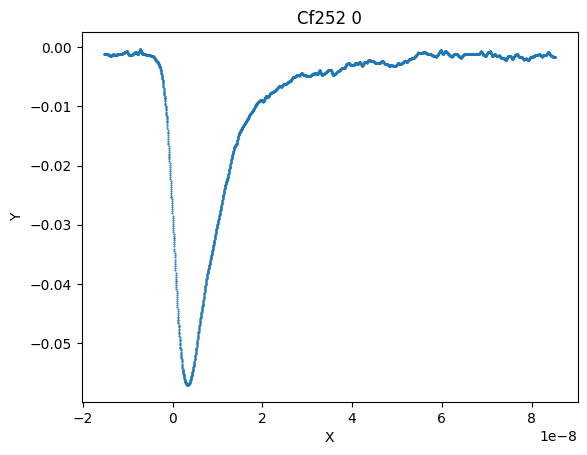

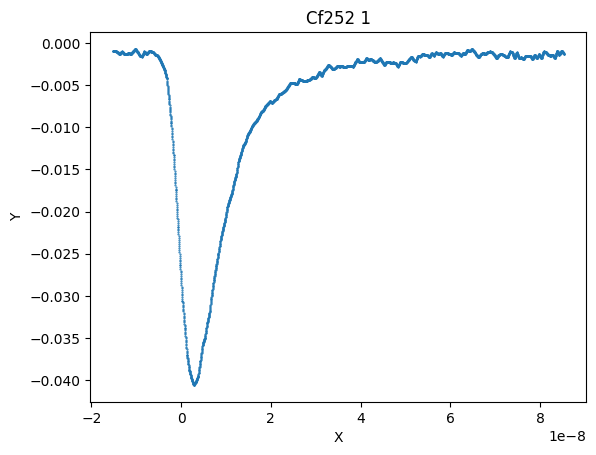

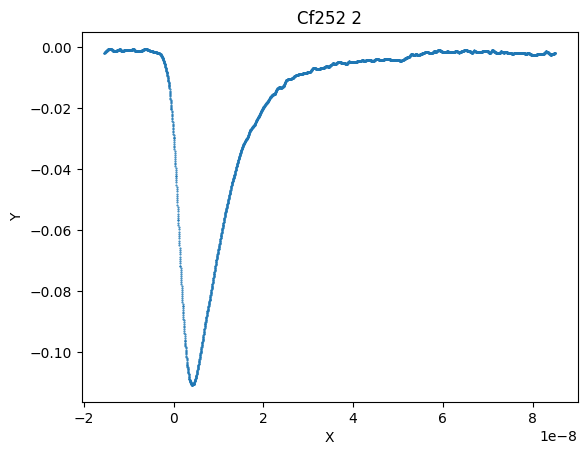

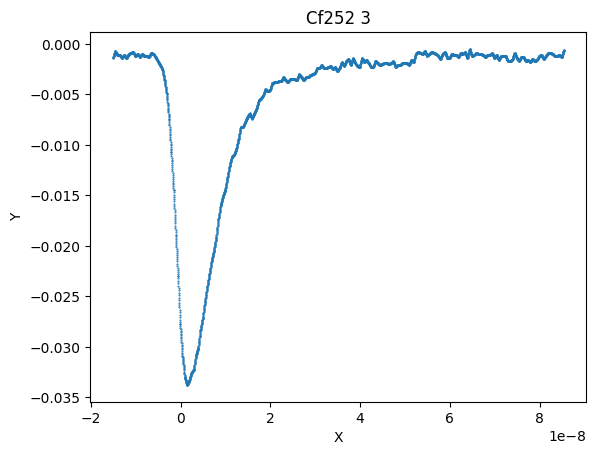

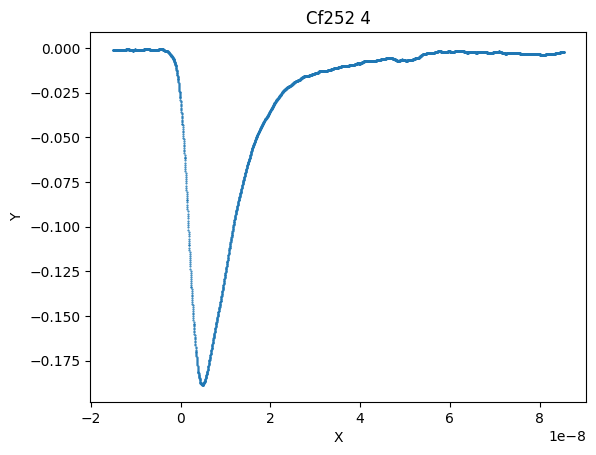

In [16]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(Cf252_x[i], Cf252_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cf252 ' + str(i + start_num))
    plt.show()

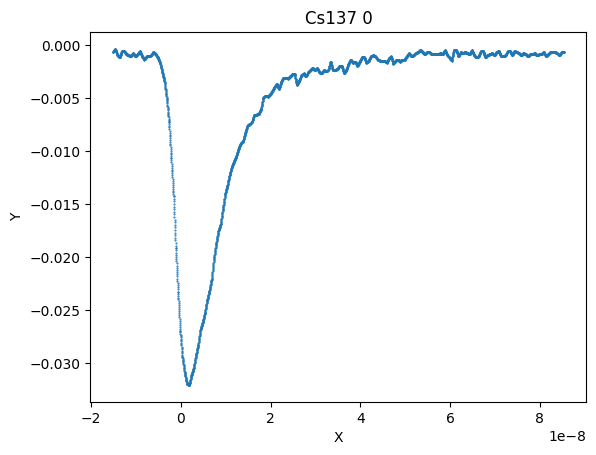

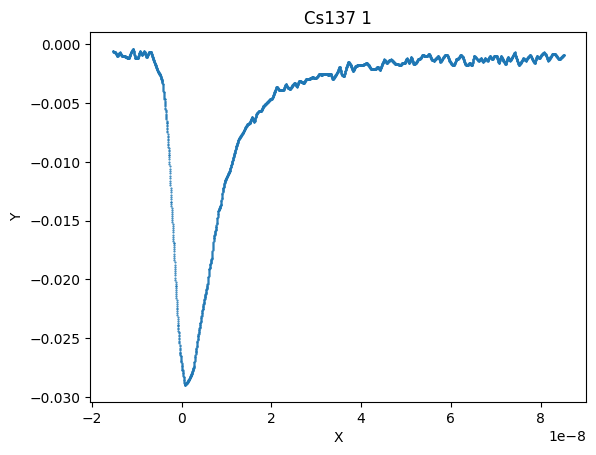

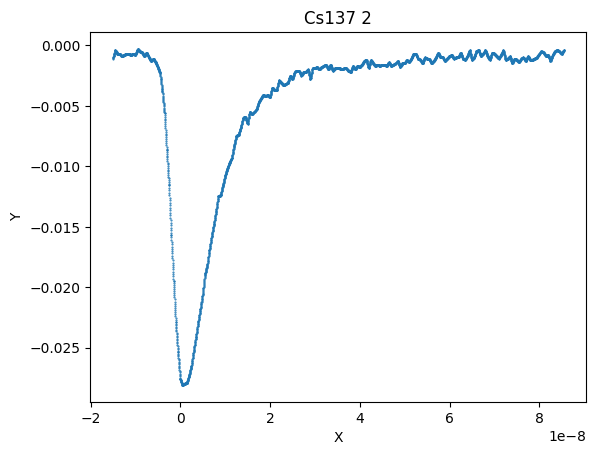

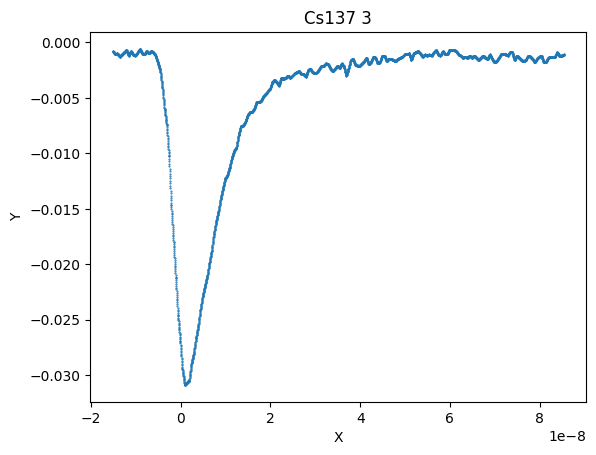

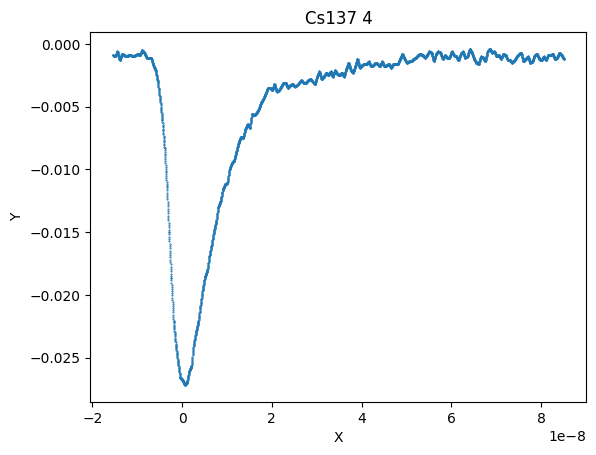

In [17]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(Cs137_x[i], Cs137_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cs137 ' + str(i + start_num))
    plt.show()